Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

Import dataset dan memberi kategori kepada data warna.

In [2]:
DATADIR = '../input/color-classification/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=200

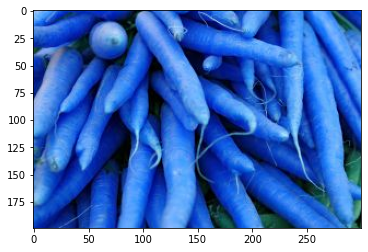

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [5]:
print(len(training_data))

107


In [6]:
lenofimage = len(training_data)

In [7]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

X.shape

(107, 120000)

In [8]:
X = X/255.0

X[1]

array([1., 1., 1., ..., 1., 1., 1.])

In [9]:
y = np.array(y)

y.shape

(107,)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X,y)

In [11]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', gamma = 'auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [12]:
y2 = svc.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y2))

0.7407407407407407


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.75      0.75      0.75         4
           2       1.00      0.50      0.67         4
           3       0.57      1.00      0.73         4
           4       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         1
           6       0.80      1.00      0.89         4
           7       1.00      1.00      1.00         4

    accuracy                           0.74        27
   macro avg       0.70      0.69      0.64        27
weighted avg       0.80      0.74      0.71        27



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
